In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
import yaml

In [2]:
def get_full_df(file_names, years, data_path, column_names):
    dfs = []
    i = 0
    for file in file_names:
        df = pd.read_csv(data_path + file, index_col= None, usecols= column_names, low_memory= False)
        df['year'] = years[i]
        i += 1
        dfs.append(df)

    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

def select_colleges(df, college_list):
    dfs = []
    for college in college_list:
        dfs.append(df.loc[df['INSTNM'] == college])
    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

data_path = '/mnt/d/Downloads/CollegeScorecard_Raw_Data_01192021/Raw Data Files/'

merged_file_names = ['MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 
                     'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 
                     'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 
                     'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 
                     'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'Most-Recent-Cohorts-All-Data-Elements.csv']

merged_years = list(range(1996, 2019))
merged_cols = pd.read_csv(data_path + 'MERGED1996_97_PP.csv', index_col=0, nrows=0).columns.tolist() #All columns throughout each file are the same



base_cols = ['INSTNM', 'year']

colleges = ["University of Colorado Boulder", "University of San Diego", "University of California-Los Angeles", "New York University", "The University of Texas at Austin"]

### INITIAL COLUMN DETERMINATIONS

In [5]:
merged_df = pd.read_csv(data_path + 'Most-Recent-Cohorts-All-Data-Elements.csv', index_col= None, low_memory= False)

In [6]:
merged_df.shape, field_df.shape

((6806, 2384), (694349, 92))

In [7]:
merged_df.replace('PrivacySuppressed', np.nan, inplace=True)
field_df.replace('PrivacySuppressed', np.nan, inplace=True)
merged_df['REPAY_DT_MDN'].replace('12/31/2999', np.nan, inplace=True)
merged_df['SEPAR_DT_MDN'].replace('12/31/2999', np.nan, inplace=True)

In [8]:
merged_df.dropna(axis=1, how='all', inplace=True)
# field_df.dropna(axis=1, how='all', inplace=True) # This one doesn't drop anything

In [9]:
merged_df.shape, field_df.shape

((6806, 2281), (694349, 92))

In [10]:
print('Fully empty columns:\n'+ str([col for col in merged_cols if col not in merged_df.columns]))

Fully empty columns:
['LOCALE2', 'UG', 'UGDS_WHITENH', 'UGDS_BLACKNH', 'UGDS_API', 'UGDS_AIANOLD', 'UGDS_HISPOLD', 'UG_NRA', 'UG_UNKN', 'UG_WHITENH', 'UG_BLACKNH', 'UG_API', 'UG_AIANOLD', 'UG_HISPOLD', 'PPTUG_EF2', 'NPT4_PROG', 'NPT4_OTHER', 'NPT41_PROG', 'NPT42_PROG', 'NPT43_PROG', 'NPT44_PROG', 'NPT45_PROG', 'NPT41_OTHER', 'NPT42_OTHER', 'NPT43_OTHER', 'NPT44_OTHER', 'NPT45_OTHER', 'NPT4_048_PROG', 'NPT4_048_OTHER', 'NPT4_3075_PROG', 'NPT4_3075_OTHER', 'NPT4_75UP_PROG', 'NPT4_75UP_OTHER', 'NUM4_PROG', 'NUM4_OTHER', 'NUM41_PROG', 'NUM42_PROG', 'NUM43_PROG', 'NUM44_PROG', 'NUM45_PROG', 'NUM41_OTHER', 'NUM42_OTHER', 'NUM43_OTHER', 'NUM44_OTHER', 'NUM45_OTHER', 'C150_4_WHITENH', 'C150_4_BLACKNH', 'C150_4_API', 'C150_4_AIANOLD', 'C150_4_HISPOLD', 'C150_L4_WHITENH', 'C150_L4_BLACKNH', 'C150_L4_API', 'C150_L4_AIANOLD', 'C150_L4_HISPOLD', 'MD_INC_DEATH_YR2_RT', 'MD_INC_UNKN_4YR_TRANS_YR2_RT', 'MD_INC_UNKN_2YR_TRANS_YR2_RT', 'HI_INC_DEATH_YR2_RT', 'HI_INC_UNKN_4YR_TRANS_YR2_RT', 'HI_INC_UNKN_

In [11]:
merged_df.dtypes

UNITID            int64
OPEID             int64
OPEID6            int64
INSTNM           object
CITY             object
                  ...  
LPPPLUS_AMT      object
LPGPLUS_CNT      object
LPGPLUS_AMT      object
FEDSCHCD         object
SEARCH_STRING    object
Length: 2281, dtype: object

In [12]:
def get_types(cols):
    d = {}
    for var, col in COL_DICT.items():
        try:
            if col['source'] in cols:
                d[col['source']] = col['type']
        except:
            try:
                if col['calculate'] in cols:
                    d[col['calculate']] = col['type']
            except:
                print(col)
    return d

with open('./data/data.yaml') as file:
    data = yaml.load(file, Loader=yaml.SafeLoader)

COL_DICT = data['dictionary']

In [13]:
merged_type_dict = get_types(merged_df.columns)

{'source': 'OPEID', 'description': '8-digit OPE ID for institution'}
{'source': 'OPEID6', 'description': '6-digit OPE ID for institution'}
{'source': 'STABBR', 'description': 'State postcode'}
{'source': 'ZIP', 'description': 'ZIP code'}
{'source': 'ACCREDAGENCY', 'description': 'Accreditor for institution'}
{'source': 'INSTURL', 'description': "URL for institution's homepage"}
{'source': 'NPCURL', 'description': "URL for institution's net price calculator"}
{'source': 'SEPAR_DT_MDN', 'description': 'Median Date Student Separated'}
{'source': 'ACCREDCODE', 'description': 'Code corresponding to accreditor (as captured from PEPS)'}
{'source': 'T4APPROVALDATE', 'description': 'Date that institution was first approved to participate in Title IV aid programs'}
{'source': 'CIPCODE1', 'description': 'CIP code of largest program'}
{'source': 'CIPCODE2', 'description': 'CIP code of program #2'}
{'source': 'CIPCODE3', 'description': 'CIP code of program #3'}
{'source': 'CIPCODE4', 'description':

In [14]:
set(merged_type_dict.values())

{'autocomplete', 'float', 'integer', 'long'}

In [15]:
merged_type_dict['OPEID'] = 'autocomplete' # Originally planned for integer however, there are letters present in some values
merged_type_dict['OPEID6'] = 'integer'
merged_type_dict['STABBR'] = 'autocomplete'
merged_type_dict['ZIP'] = 'autocomplete' # Originally planned for integer however, there are hyphens present in some values
merged_type_dict['ACCREDAGENCY'] = 'autocomplete'
merged_type_dict['INSTURL'] = 'autocomplete'
merged_type_dict['NPCURL'] = 'autocomplete'
merged_type_dict['SEPAR_DT_MDN'] = 'date'
merged_type_dict['ACCREDCODE'] = 'autocomplete'
merged_type_dict['T4APPROVALDATE'] = 'date'
merged_type_dict['CIPCODE1'] = 'float'
merged_type_dict['CIPCODE2'] = 'float'
merged_type_dict['CIPCODE3'] = 'float'
merged_type_dict['CIPCODE4'] = 'float'
merged_type_dict['CIPCODE5'] = 'float'
merged_type_dict['CIPCODE6'] = 'float'
merged_type_dict['CIPTITLE1'] = 'autocomplete'
merged_type_dict['CIPTITLE2'] = 'autocomplete'
merged_type_dict['CIPTITLE3'] = 'autocomplete'
merged_type_dict['CIPTITLE4'] = 'autocomplete'
merged_type_dict['CIPTITLE5'] = 'autocomplete'
merged_type_dict['CIPTITLE6'] = 'autocomplete'
merged_type_dict['FEDSCHCD'] = 'autocomplete' # Originally planned for integer however, there are letters present in some values


In [16]:
numeric_cols = []
for k, v in merged_type_dict.items():
    if v in ['float', 'integer', 'long']:
        numeric_cols.append(k)
# I double checked that the 3 date fields defined above are the only ones present in the data
date_cols = []
for k, v in merged_type_dict.items():
    if v == 'date':
        date_cols.append(k)

In [17]:
date_cols

['SEPAR_DT_MDN', 'T4APPROVALDATE']

In [18]:
for col in numeric_cols:
    merged_df[col] = merged_df[col].apply(pd.to_numeric, errors='raise')
for col in date_cols:
    print(col)
    merged_df[col] = pd.to_datetime(merged_df[col], format='%m/%d/%Y', errors='raise')

SEPAR_DT_MDN
T4APPROVALDATE


In [19]:
merged_df['completion_rate'] = merged_df['C150_4'].fillna(merged_df['C150_L4'])

In [20]:
corr_df = merged_df.copy()

In [21]:
pool_cols = [col for col in corr_df.columns if 'POOL' in col] # These are colinear with their non pool counterparts
corr_df.drop(pool_cols, axis=1, inplace=True)
c_cols = [col for col in corr_df.columns if ('C100_' in col) or ('C150_' in col) or ('C200_' in col)]  # These are colinear with completion_rate
corr_df.drop(c_cols, axis=1, inplace=True)
d_cols = [col for col in corr_df.columns if ('D100_' in col) or ('D150_' in col) or ('D200_' in col)]  # These are colinear with completion_rate
corr_df.drop(d_cols, axis=1, inplace=True)
rt_cols = [col for col in corr_df.columns if '_RT' in col]  # These columns imply completion
corr_df.drop(rt_cols, axis=1, inplace=True)
owaw_cols = [col for col in corr_df.columns if 'OMAW' in col]  # These columns imply completion
corr_df.drop(owaw_cols, axis=1, inplace=True)
comp_cols = [col for col in corr_df.columns if 'COMP' in col]  # These columns imply completion
corr_df.drop(comp_cols, axis=1, inplace=True)
omenr_cols = [col for col in corr_df.columns if 'OMENR' in col]  # These columns imply completion
corr_df.drop(omenr_cols, axis=1, inplace=True)
omacht_cols = [col for col in corr_df.columns if 'OMACHT' in col]  # These columns imply completion
corr_df.drop(omacht_cols, axis=1, inplace=True)
bbrr1_cols = [col for col in corr_df.columns if 'BBRR1' in col]  # These columns are colinear with BBRR2 columns and BBRR2 are generally more coorelated with completion_rate
corr_df.drop(bbrr1_cols, axis=1, inplace=True)

In [22]:
cr_corr = corr_df.corrwith(corr_df['completion_rate'])

In [23]:
high_corrs = cr_corr.loc[np.abs(cr_corr.values) > 0.35]
high_corrs.index

Index(['CONTROL', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25',
       'SATWR75', 'SATVRMID', 'SATMTMID', 'SATWRMID', 'ACTCM25', 'ACTCM75',
       'ACTEN25', 'ACTEN75', 'ACTMT25', 'ACTMT75', 'ACTWR25', 'ACTWR75',
       'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID', 'SAT_AVG',
       'SAT_AVG_ALL', 'PCIP24', 'CIP11ASSOC', 'CIP13ASSOC', 'CIP15ASSOC',
       'CIP24ASSOC', 'CIP43ASSOC', 'CIP47ASSOC', 'CIP50ASSOC', 'CIP51ASSOC',
       'CIP52CERT2', 'CIP52ASSOC', 'PPTUG_EF', 'NPT4_PUB', 'NPT42_PUB',
       'NPT43_PUB', 'NPT44_PUB', 'NPT45_PUB', 'NPT4_3075_PUB', 'NPT4_75UP_PUB',
       'COSTT4_A', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PFTFTUG1_EF', 'RET_FT4',
       'RET_FTL4', 'RET_PTL4', 'INC_PCT_H2', 'DEP_INC_PCT_H2', 'NOLOAN_YR2_N',
       'CUML_DEBT_P25', 'CUML_DEBT_P10', 'LOAN_EVER', 'MN_EARN_WNE_INC2_P10',
       'MN_EARN_WNE_INDEP0_INC1_P10', 'MN_EARN_WNE_MALE0_P10',
       'MN_EARN_WNE_MALE1_P10', 'MN_EARN_WNE_INDEP0_INC1_P6', 'TRANS_L4',
       'SCHTYPE', 'PLUS_DEBT_INST_M

<AxesSubplot:>

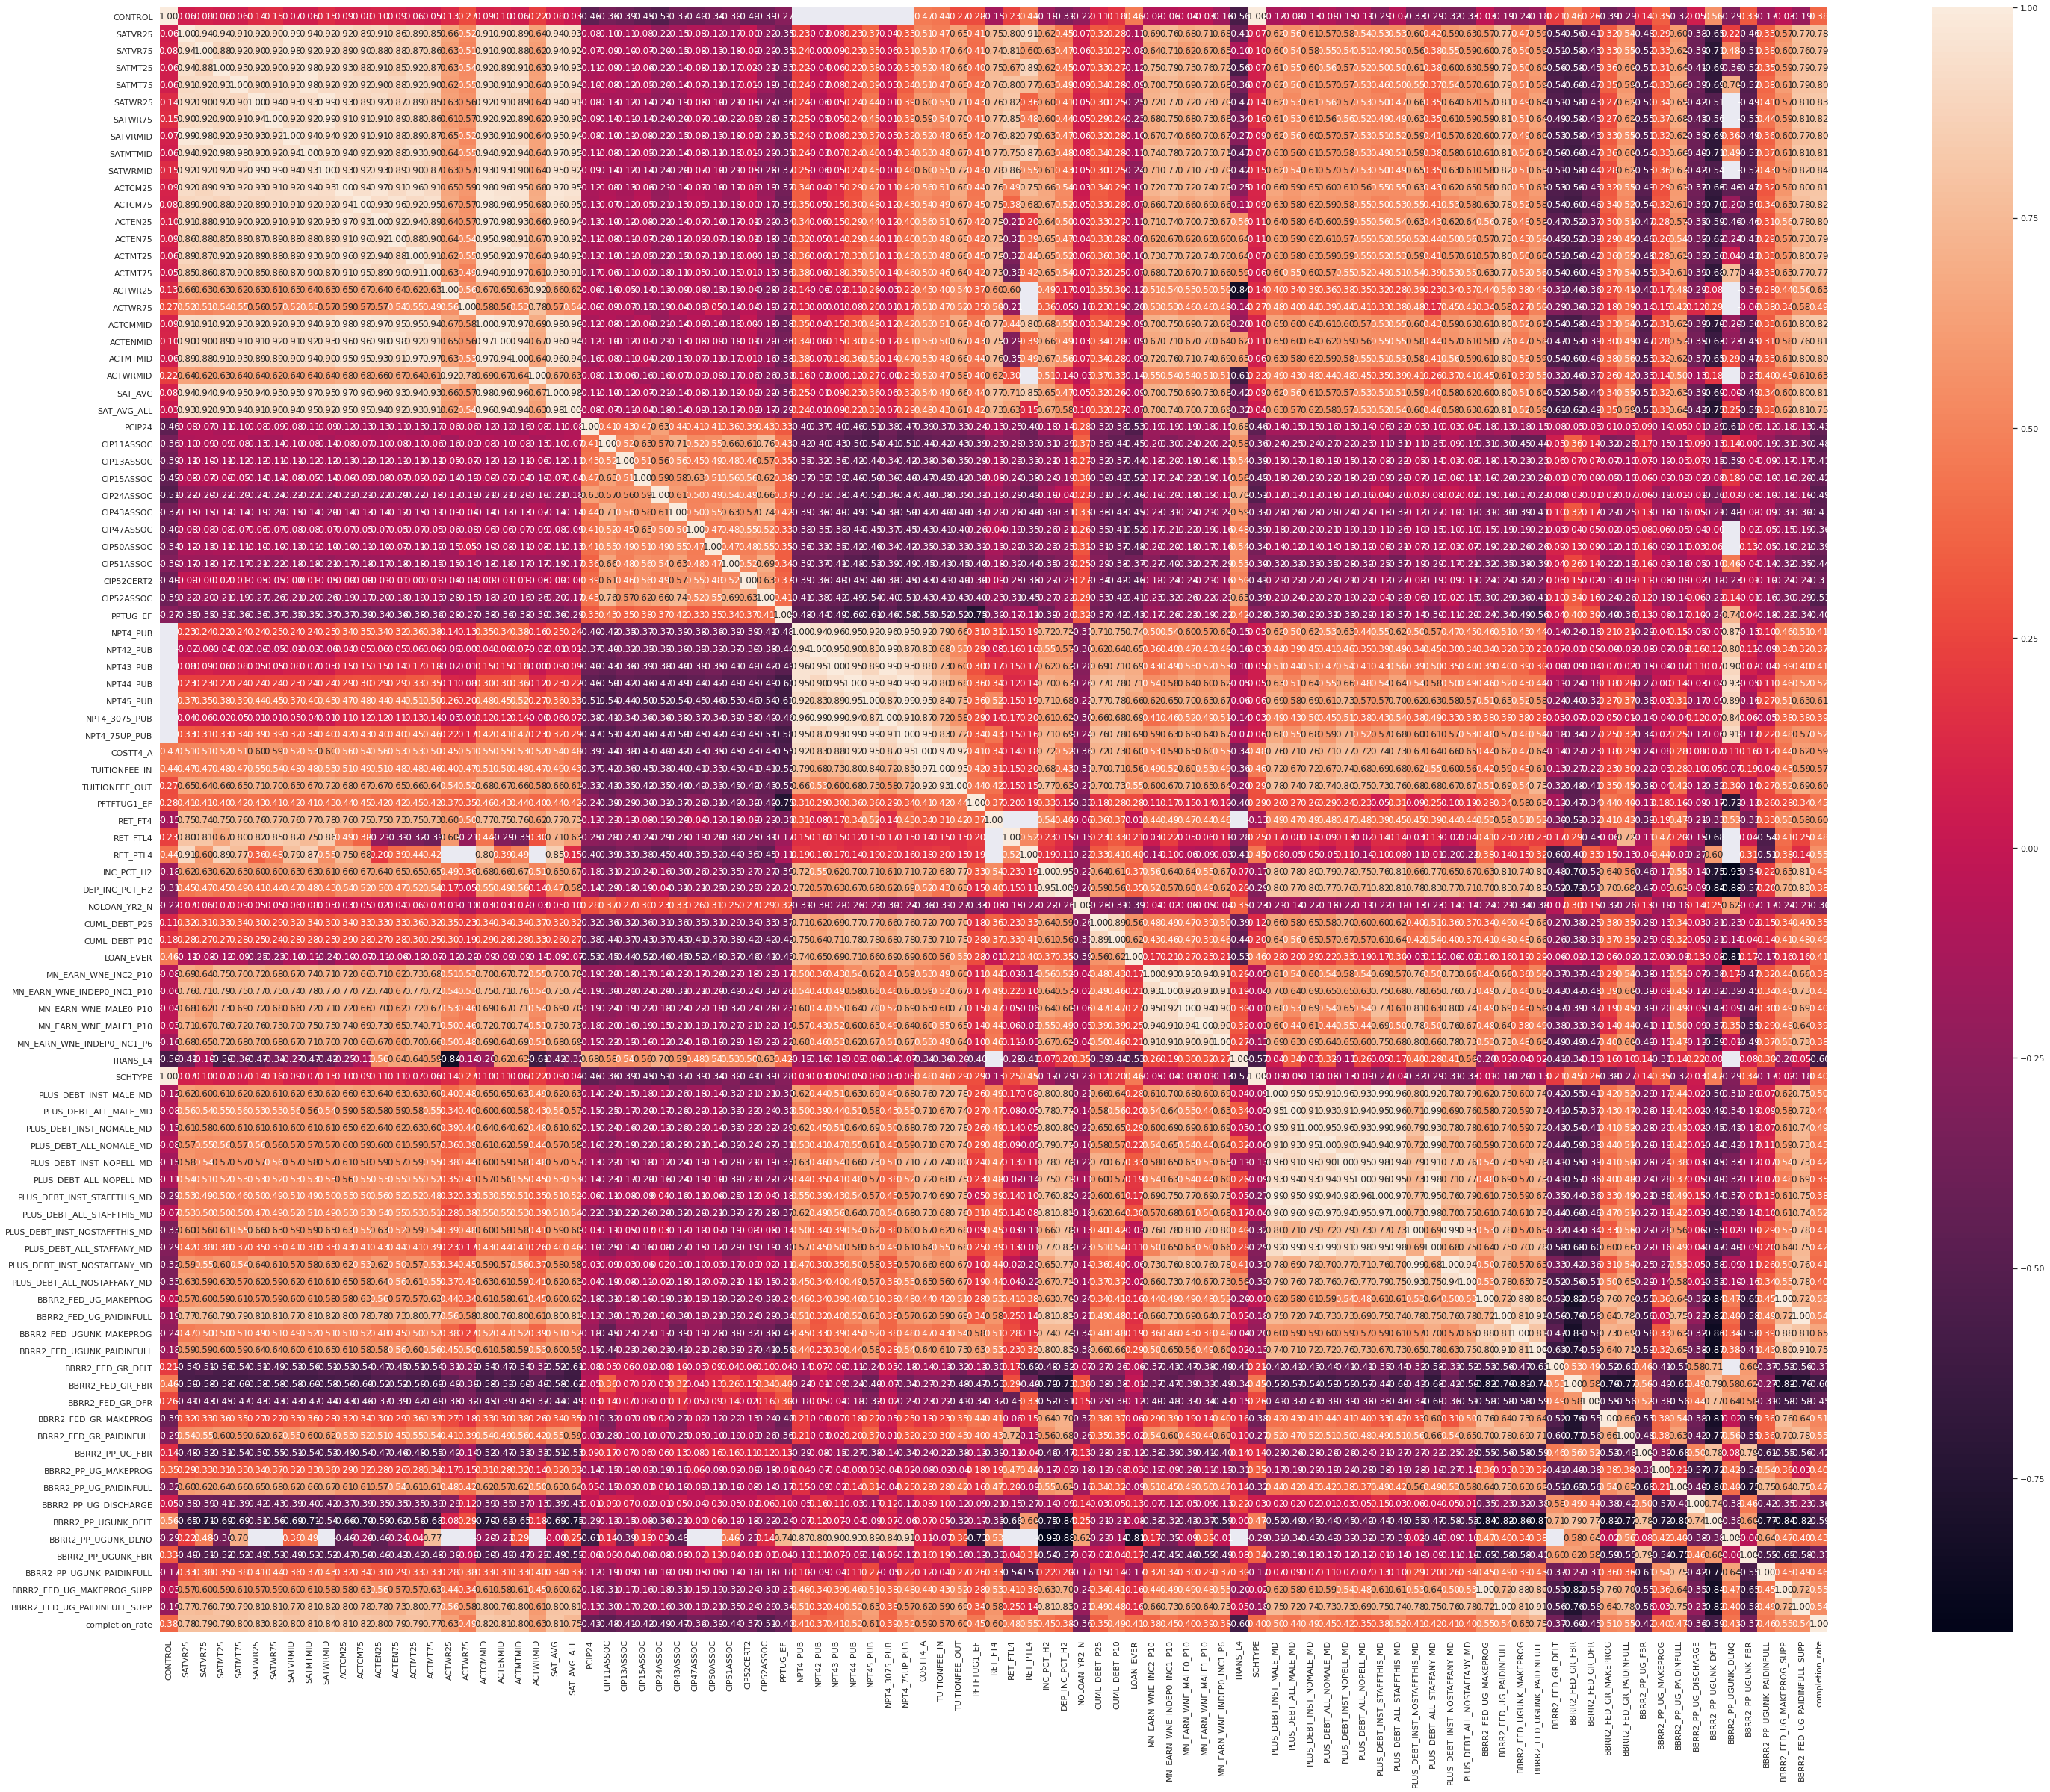

In [24]:
sns.set(rc={'figure.figsize':(50,40)})
sns.heatmap(corr_df[high_corrs.index].corr(),annot=True, fmt=".2f")

<AxesSubplot:>

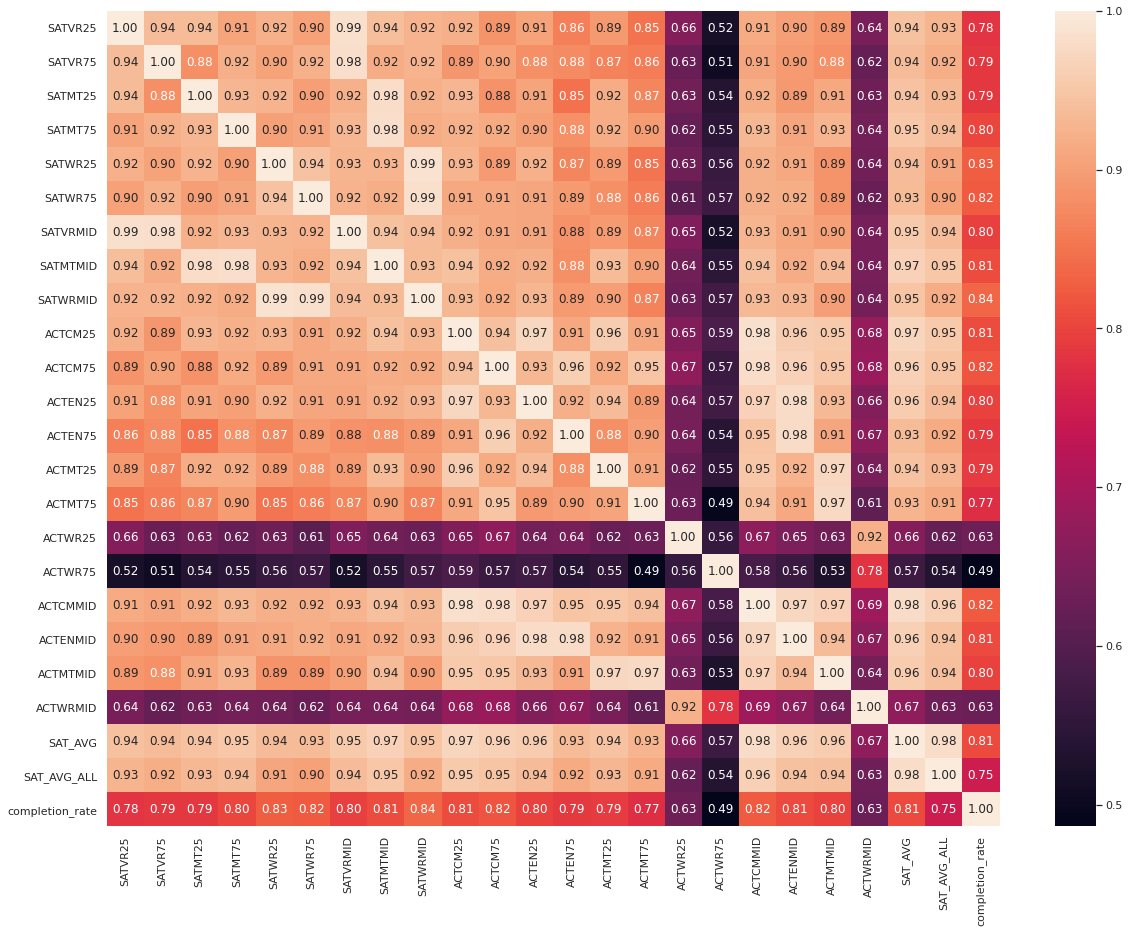

In [25]:
test_cols = [col for col in high_corrs.index if ('ACT' in col) or ('SAT' in col)] 
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(corr_df[test_cols + ['completion_rate']].corr(), annot=True, fmt=".2f")

In [26]:
corr_model_cols = ['ACTWR25', 'SAT_AVG', 'COSTT4_A', 'BBRR2_FED_UGUNK_PAIDINFULL', 'BBRR2_FED_GR_FBR', 'CONTROL', 'PCIP24', 
                   'CIP11ASSOC', 'CIP13ASSOC', 'CIP15ASSOC', 'CIP24ASSOC', 'CIP43ASSOC', 'CIP47ASSOC', 'CIP50ASSOC',
                   'CIP51ASSOC', 'CIP52CERT2', 'PPTUG_EF', 'PFTFTUG1_EF', 'NOLOAN_YR2_N', 'CUML_DEBT_P10', 
                   'LOAN_EVER', 'PLUS_DEBT_INST_NOSTAFFTHIS_MD', 'completion_rate']

<AxesSubplot:>

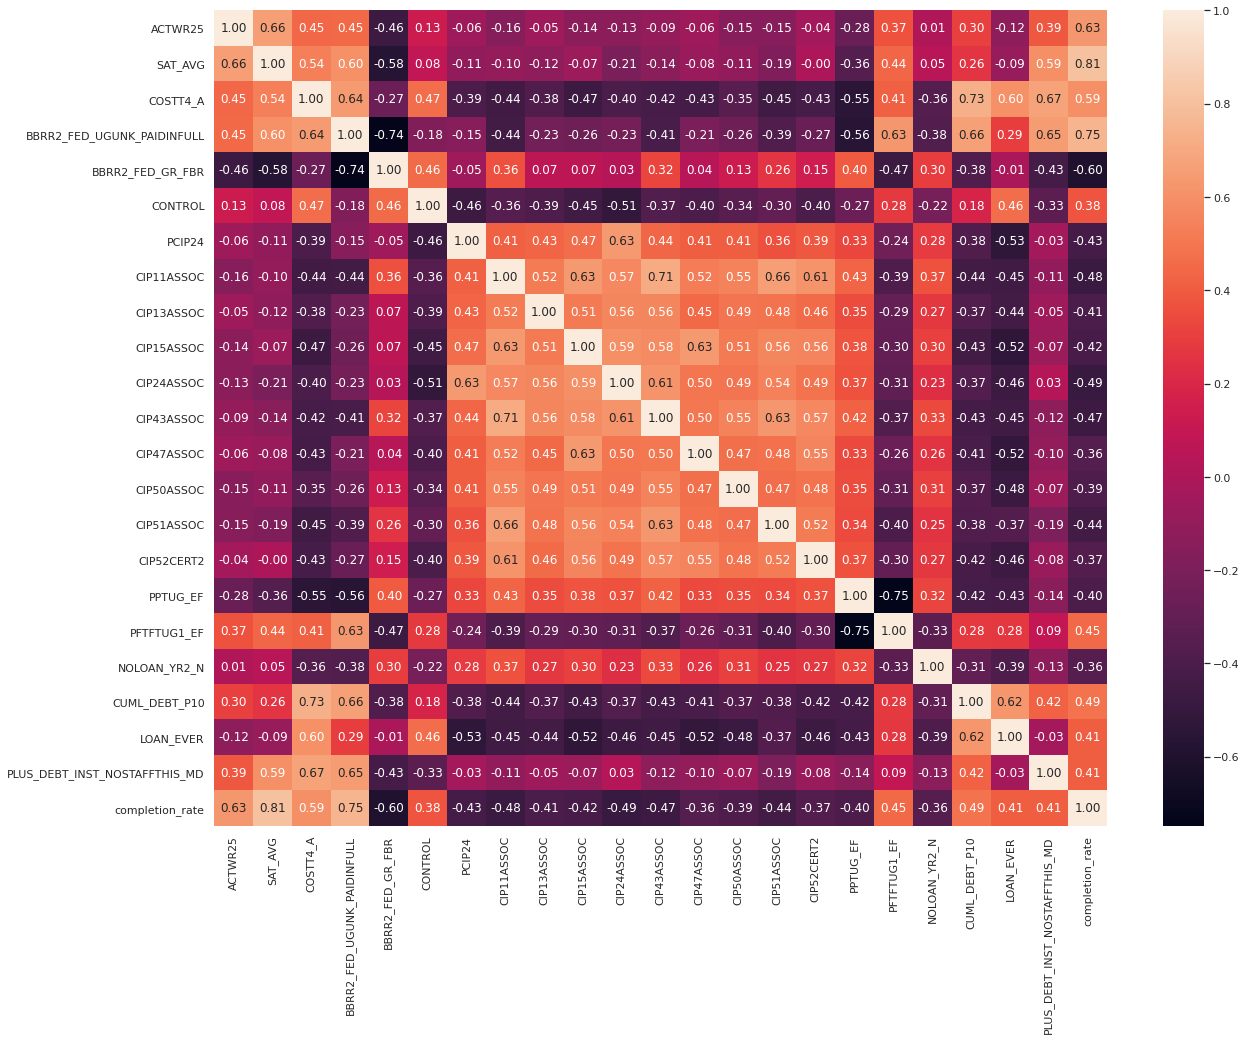

In [27]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(corr_df[corr_model_cols].corr(),annot=True, fmt=".2f")

In [34]:
hand_picked_model_cols = ['MAIN', 'NUMBRANCH', 'HIGHDEG', 'PCIP24', 'UGDS', 'TUITFTE', 
                          'INEXPFTE', 'PCTPELL', 'COSTT4_A', 'COSTT4_P', 'PCTFLOAN', 'AGE_ENTRY', 
                          'VETERAN', 'FIRST_GEN', 'POVERTY_RATE', 'UNEMP_RATE', 'STABBR', 'INSTNM',
                          'OPENADMP', 'LPSTAFFORD_CNT', 'LPSTAFFORD_AMT', 'LPPPLUS_CNT', 'LPPPLUS_AMT',
                          'completion_rate']
price_cols = ['COSTT4_A', 'COSTT4_P']
work_cols = ['COUNT_NWNE_P10', 'COUNT_WNE_P10', 'MN_EARN_WNE_P10', 'PCT90_EARN_WNE_P10', 'MN_EARN_WNE_INC3_P10', 'COUNT_NWNE_P6', 'COUNT_WNE_P6', 'MN_EARN_WNE_P6']
pcip_cols = [col for col in merged_cols if 'PCIP' in col]
dependant_cols = ['C150_4', 'C150_L4']

keep_cols = list(set(base_cols + corr_model_cols + hand_picked_model_cols + price_cols + work_cols + pcip_cols))
keep_cols.remove('completion_rate')
keep_cols.remove('INSTNM')
keep_cols.remove('year')
keep_cols.sort()
keep_cols = list(['INSTNM'] + keep_cols + dependant_cols)
print(keep_cols)

['INSTNM', 'ACTWR25', 'AGE_ENTRY', 'BBRR2_FED_GR_FBR', 'BBRR2_FED_UGUNK_PAIDINFULL', 'CIP11ASSOC', 'CIP13ASSOC', 'CIP15ASSOC', 'CIP24ASSOC', 'CIP43ASSOC', 'CIP47ASSOC', 'CIP50ASSOC', 'CIP51ASSOC', 'CIP52CERT2', 'CONTROL', 'COSTT4_A', 'COSTT4_P', 'COUNT_NWNE_P10', 'COUNT_NWNE_P6', 'COUNT_WNE_P10', 'COUNT_WNE_P6', 'CUML_DEBT_P10', 'FIRST_GEN', 'HIGHDEG', 'INEXPFTE', 'LOAN_EVER', 'LPPPLUS_AMT', 'LPPPLUS_CNT', 'LPSTAFFORD_AMT', 'LPSTAFFORD_CNT', 'MAIN', 'MN_EARN_WNE_INC3_P10', 'MN_EARN_WNE_P10', 'MN_EARN_WNE_P6', 'NOLOAN_YR2_N', 'NUMBRANCH', 'OPENADMP', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'PCT90_EARN_WNE_P10', 'PCTFLOAN', 'PCTPELL', 'PFTFTUG1_EF', 'PLU

<AxesSubplot:>

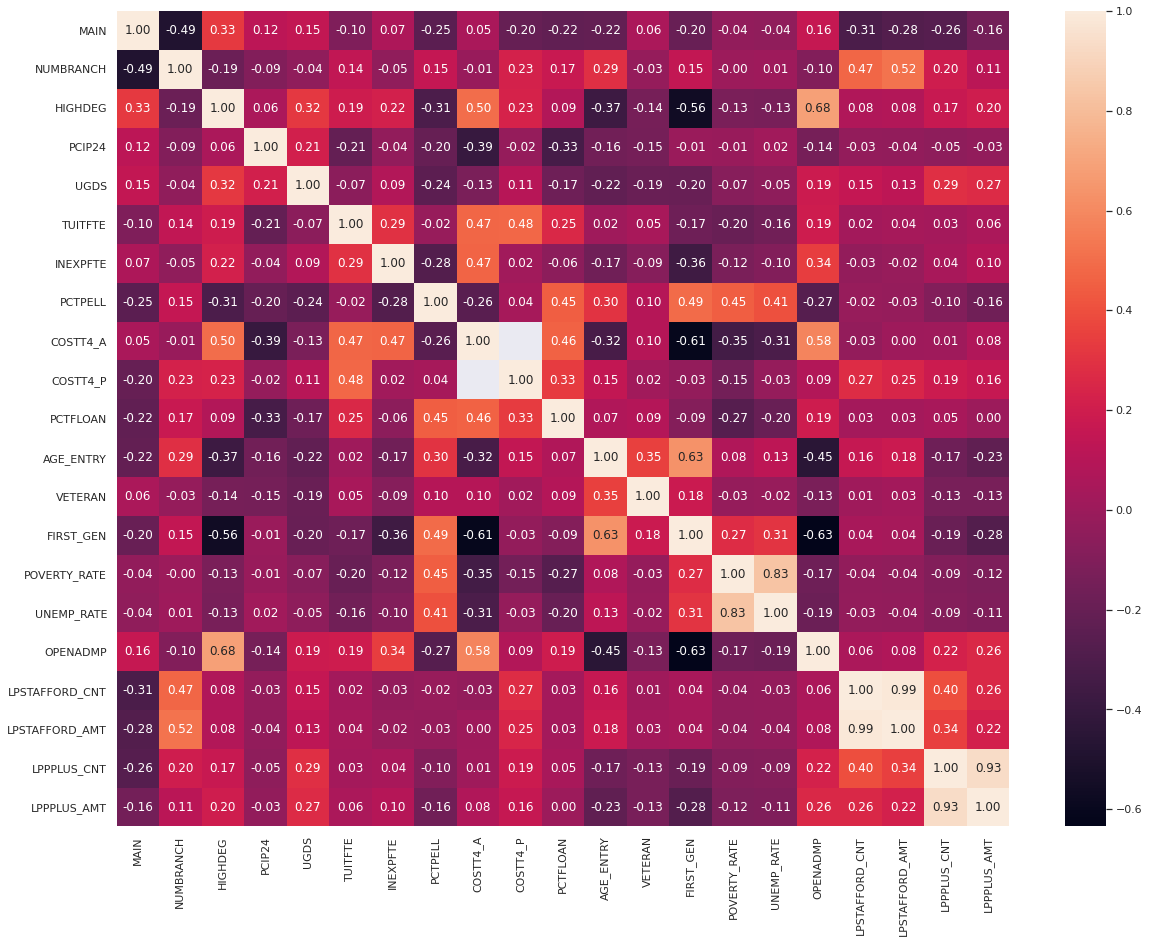

In [252]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(corr_df[hand_picked_model_cols].corr(),annot=True, fmt=".2f")

### DATA CLEARNING

In [35]:
full_merged_df = get_full_df(merged_file_names, merged_years, data_path, keep_cols)

In [36]:
full_merged_df.head()

INSTNM STABBR  MAIN  NUMBRANCH  HIGHDEG  \
0      Community College of the Air Force     AL     1          1        2   
1                Alabama A & M University     AL     1          1        4   
2     University of Alabama at Birmingham     AL     1          2        4   
3  ALABAMA AVIATION AND TECHNICAL COLLEGE     AL     1          1        2   
4                      Amridge University     AL     1          1        4   

   CONTROL  ACTWR25  SAT_AVG  PCIP01  PCIP03  ...  MN_EARN_WNE_P6  OPENADMP  \
0      1.0      NaN      NaN  0.0000  0.0000  ...             NaN       NaN   
1      1.0      NaN      NaN  0.0323  0.0323  ...             NaN       NaN   
2      1.0      NaN      NaN  0.0000  0.0000  ...             NaN       NaN   
3      1.0      NaN      NaN  0.0000  0.0000  ...             NaN       NaN   
4      2.0      NaN      NaN  0.0000  0.0000  ...             NaN       NaN   

   PLUS_DEBT_INST_NOSTAFFTHIS_MD  BBRR2_FED_UGUNK_PAIDINFULL  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4                            NaN                         NaN   

   BBRR2_FED_GR_FBR  LPSTAFFORD_CNT  LPSTAFFORD_AMT  LPPPLUS_CNT  LPPPLUS_AMT  \
0               NaN             NaN             NaN          NaN          NaN   
1               NaN             NaN             NaN          NaN          NaN   
2               NaN             NaN             NaN          NaN          NaN   
3               NaN             NaN             NaN          NaN          NaN   
4               NaN             NaN             NaN          NaN          NaN   

   year  
0  1996  
1  1996  
2  1996  
3  1996  
4  1996  

[5 rows x 91 columns]

In [37]:
full_merged_df.shape

(163331, 91)

In [38]:
pd.DataFrame(full_merged_df.dtypes).T

INSTNM  STABBR   MAIN NUMBRANCH HIGHDEG  CONTROL  ACTWR25  SAT_AVG  \
0  object  object  int64     int64   int64  float64  float64  float64   

    PCIP01   PCIP03  ... MN_EARN_WNE_P6 OPENADMP  \
0  float64  float64  ...         object  float64   

  PLUS_DEBT_INST_NOSTAFFTHIS_MD BBRR2_FED_UGUNK_PAIDINFULL BBRR2_FED_GR_FBR  \
0                        object                     object           object   

  LPSTAFFORD_CNT LPSTAFFORD_AMT LPPPLUS_CNT LPPPLUS_AMT   year  
0         object         object      object      object  int64  

[1 rows x 91 columns]

In [39]:
full_merged_df.replace('PrivacySuppressed', np.nan, inplace=True)
full_merged_df.dropna(axis=1, how='all', inplace=True)
print('Fully empty columns:\n'+ str([col for col in keep_cols if col not in full_merged_df.columns]))

Fully empty columns:
[]


In [40]:
full_merged_type_dict = get_types(full_merged_df.columns)

{'source': 'STABBR', 'description': 'State postcode'}


In [41]:
full_merged_type_dict['STABBR'] = 'autocomplete'

In [42]:
numeric_cols = []
for k, v in full_merged_type_dict.items():
    if v in ['float', 'integer', 'long']:
        numeric_cols.append(k)
# I double checked that the 3 date fields defined above are the only ones present in the data
date_cols = []
for k, v in full_merged_type_dict.items():
    if v == 'date':
        date_cols.append(k)

In [43]:
for col in numeric_cols:
    full_merged_df[col] = full_merged_df[col].apply(pd.to_numeric, errors='raise')
for col in date_cols:
    print(col)
    full_merged_df[col] = pd.to_datetime(full_merged_df[col], format='%m/%d/%Y', errors='raise')

In [44]:
pd.DataFrame(full_merged_df.dtypes).T

INSTNM  STABBR   MAIN NUMBRANCH HIGHDEG  CONTROL  ACTWR25  SAT_AVG  \
0  object  object  int64     int64   int64  float64  float64  float64   

    PCIP01   PCIP03  ... MN_EARN_WNE_P6 OPENADMP  \
0  float64  float64  ...        float64  float64   

  PLUS_DEBT_INST_NOSTAFFTHIS_MD BBRR2_FED_UGUNK_PAIDINFULL BBRR2_FED_GR_FBR  \
0                       float64                    float64          float64   

  LPSTAFFORD_CNT LPSTAFFORD_AMT LPPPLUS_CNT LPPPLUS_AMT   year  
0        float64        float64     float64     float64  int64  

[1 rows x 91 columns]

<AxesSubplot:xlabel='NUMBRANCH'>

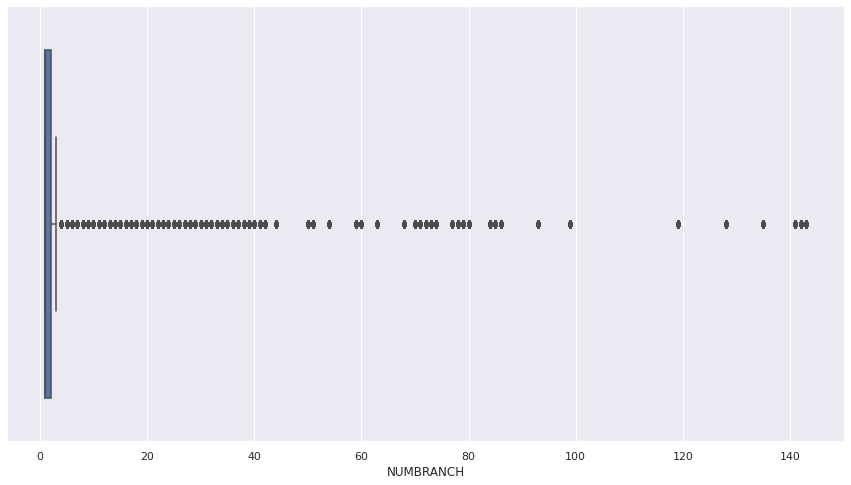

In [45]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='NUMBRANCH',
             data=full_merged_df)

In [46]:
full_merged_df.loc[full_merged_df['NUMBRANCH'] > 100, 'INSTNM']

95906               ITT Technical Institute-Tucson
95907                ITT Technical Institute-Tempe
96000       ITT Technical Institute-Rancho Cordova
96179        ITT Technical Institute-National City
96180            ITT Technical Institute-San Dimas
                            ...                   
141257       ITT Technical Institute-Overland Park
141258         ITT Technical Institute-Springfield
141259        ITT Technical Institute-West Chester
141367           ITT Technical Institute-Pensacola
141368    ITT Technical Institute-San Antonio East
Name: INSTNM, Length: 808, dtype: object

<AxesSubplot:xlabel='SAT_AVG'>

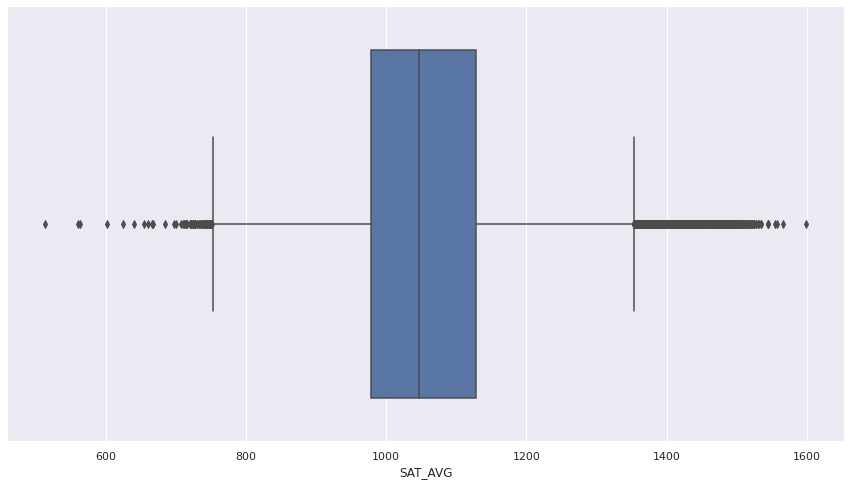

In [47]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='SAT_AVG',
             data=full_merged_df)

In [48]:
full_merged_df.loc[full_merged_df['SAT_AVG'] > 1550, 'INSTNM']

55916     The New England Conservatory of Music
142392       California Institute of Technology
149625       California Institute of Technology
156728       California Institute of Technology
Name: INSTNM, dtype: object

In [49]:
full_merged_df.loc[full_merged_df['INSTNM'] == 'The New England Conservatory of Music'][['INSTNM','SAT_AVG']]

INSTNM  SAT_AVG
2309    The New England Conservatory of Music      NaN
9211    The New England Conservatory of Music      NaN
16074   The New England Conservatory of Music      NaN
22737   The New England Conservatory of Music      NaN
29312   The New England Conservatory of Music      NaN
35953   The New England Conservatory of Music      NaN
42655   The New England Conservatory of Music      NaN
49286   The New England Conservatory of Music      NaN
55916   The New England Conservatory of Music   1599.0
62652   The New England Conservatory of Music    813.0
69531   The New England Conservatory of Music      NaN
76462   The New England Conservatory of Music      NaN
83419   The New England Conservatory of Music      NaN
90453   The New England Conservatory of Music      NaN
97634   The New England Conservatory of Music      NaN
105086  The New England Conservatory of Music      NaN
112800  The New England Conservatory of Music      NaN
120629  The New England Conservatory of Music      NaN
128477  The New England Conservatory of Music      NaN
136183  The New England Conservatory of Music      NaN
143798  The New England Conservatory of Music      NaN
151002  The New England Conservatory of Music      NaN
158046  The New England Conservatory of Music      NaN

In [50]:
full_merged_df.loc[full_merged_df['INSTNM'] == 'California Institute of Technology'][['INSTNM','SAT_AVG']]

INSTNM  SAT_AVG
301     California Institute of Technology      NaN
7296    California Institute of Technology      NaN
14216   California Institute of Technology      NaN
20914   California Institute of Technology      NaN
27523   California Institute of Technology      NaN
34177   California Institute of Technology   1520.0
40903   California Institute of Technology   1525.0
47547   California Institute of Technology   1520.0
54210   California Institute of Technology   1510.0
60952   California Institute of Technology   1510.0
67848   California Institute of Technology   1520.0
74793   California Institute of Technology   1517.0
81763   California Institute of Technology   1514.0
88818   California Institute of Technology   1514.0
96036   California Institute of Technology   1528.0
103505  California Institute of Technology   1520.0
111249  California Institute of Technology   1520.0
119108  California Institute of Technology   1534.0
126970  California Institute of Technology   1545.0
134733  California Institute of Technology   1544.0
142392  California Institute of Technology   1555.0
149625  California Institute of Technology   1558.0
156728  California Institute of Technology   1566.0

In [51]:
full_merged_df.drop(full_merged_df.loc[full_merged_df['INSTNM'] == 'The New England Conservatory of Music'].index, inplace=True)

<AxesSubplot:xlabel='UGDS'>

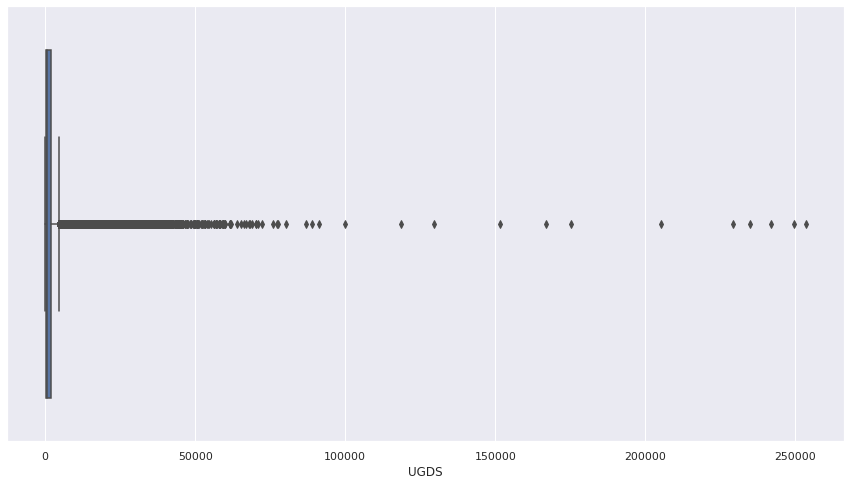

In [52]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='UGDS',
             data=full_merged_df)

In [53]:
full_merged_df.loc[full_merged_df['UGDS'] >200000, 'INSTNM']

19211                HARCOURT LEARNING DIRECT
86431     University of Phoenix-Online Campus
93440     University of Phoenix-Online Campus
100605    University of Phoenix-Online Campus
108041    University of Phoenix-Online Campus
115727    University of Phoenix-Online Campus
Name: INSTNM, dtype: object

<AxesSubplot:xlabel='INEXPFTE'>

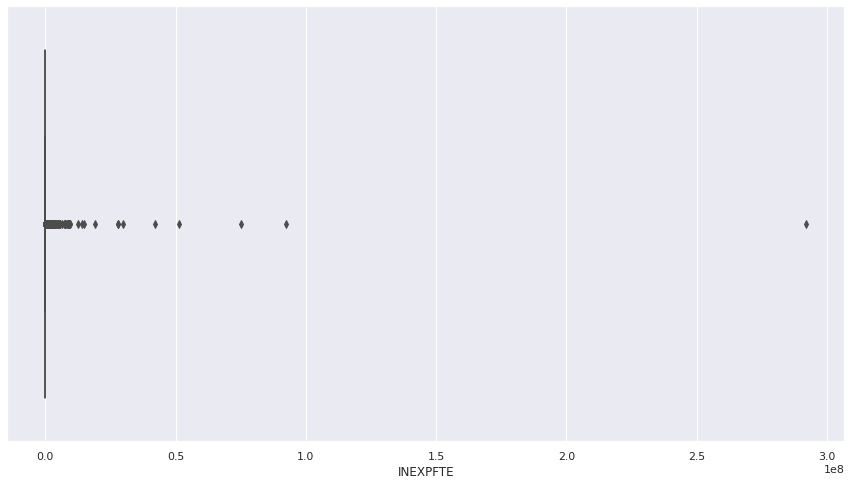

In [54]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='INEXPFTE',
             data=full_merged_df)

In [55]:
full_merged_df.loc[full_merged_df['INEXPFTE'] > 100000000, 'INSTNM']

78312    St Joseph School of Nursing
Name: INSTNM, dtype: object

In [56]:
full_merged_df.loc[(full_merged_df['INSTNM'] == 'St Joseph School of Nursing')][['INSTNM','INEXPFTE']]

INSTNM     INEXPFTE
3001    St Joseph School of Nursing          NaN
4529    St Joseph School of Nursing          NaN
9871    St Joseph School of Nursing          NaN
11349   St Joseph School of Nursing          NaN
16705   St Joseph School of Nursing       1865.0
18155   St Joseph School of Nursing      11739.0
23350   St Joseph School of Nursing       1979.0
24766   St Joseph School of Nursing      10019.0
29908   St Joseph School of Nursing       1691.0
31307   St Joseph School of Nursing       4256.0
36547   St Joseph School of Nursing         13.0
37924   St Joseph School of Nursing    1673491.0
43242   St Joseph School of Nursing       9770.0
44591   St Joseph School of Nursing     676471.0
49862   St Joseph School of Nursing       3409.0
51196   St Joseph School of Nursing      49892.0
56479   St Joseph School of Nursing       6294.0
57807   St Joseph School of Nursing    1759280.0
63212   St Joseph School of Nursing       4663.0
64526   St Joseph School of Nursing          NaN
70091   St Joseph School of Nursing       3455.0
71399   St Joseph School of Nursing       8696.0
77016   St Joseph School of Nursing       4555.0
78312   St Joseph School of Nursing  292015675.0
83965   St Joseph School of Nursing       5073.0
85256   St Joseph School of Nursing    2422164.0
90994   St Joseph School of Nursing      12842.0
92272   St Joseph School of Nursing      13644.0
98169   St Joseph School of Nursing       7629.0
99438   St Joseph School of Nursing      16847.0
105614  St Joseph School of Nursing       8333.0
106878  St Joseph School of Nursing      13602.0
113323  St Joseph School of Nursing      10761.0
114579  St Joseph School of Nursing       9210.0
121146  St Joseph School of Nursing       6600.0
122383  St Joseph School of Nursing      13092.0
128988  St Joseph School of Nursing       6996.0
130211  St Joseph School of Nursing      13252.0
136682  St Joseph School of Nursing      11886.0
137884  St Joseph School of Nursing      16111.0
144282  St Joseph School of Nursing       8062.0
145446  St Joseph School of Nursing      14455.0
151475  St Joseph School of Nursing       8428.0
152614  St Joseph School of Nursing      18384.0
158510  St Joseph School of Nursing      11418.0
159609  St Joseph School of Nursing      12252.0

In [57]:
full_merged_df['INEXPFTE'].where(full_merged_df['INEXPFTE'] < 20000, np.nan, inplace=True)

In [58]:
full_merged_df.loc[(full_merged_df['INSTNM'] == 'St Joseph School of Nursing')][['INSTNM','INEXPFTE']]

INSTNM  INEXPFTE
3001    St Joseph School of Nursing       NaN
4529    St Joseph School of Nursing       NaN
9871    St Joseph School of Nursing       NaN
11349   St Joseph School of Nursing       NaN
16705   St Joseph School of Nursing    1865.0
18155   St Joseph School of Nursing   11739.0
23350   St Joseph School of Nursing    1979.0
24766   St Joseph School of Nursing   10019.0
29908   St Joseph School of Nursing    1691.0
31307   St Joseph School of Nursing    4256.0
36547   St Joseph School of Nursing      13.0
37924   St Joseph School of Nursing       NaN
43242   St Joseph School of Nursing    9770.0
44591   St Joseph School of Nursing       NaN
49862   St Joseph School of Nursing    3409.0
51196   St Joseph School of Nursing       NaN
56479   St Joseph School of Nursing    6294.0
57807   St Joseph School of Nursing       NaN
63212   St Joseph School of Nursing    4663.0
64526   St Joseph School of Nursing       NaN
70091   St Joseph School of Nursing    3455.0
71399   St Joseph School of Nursing    8696.0
77016   St Joseph School of Nursing    4555.0
78312   St Joseph School of Nursing       NaN
83965   St Joseph School of Nursing    5073.0
85256   St Joseph School of Nursing       NaN
90994   St Joseph School of Nursing   12842.0
92272   St Joseph School of Nursing   13644.0
98169   St Joseph School of Nursing    7629.0
99438   St Joseph School of Nursing   16847.0
105614  St Joseph School of Nursing    8333.0
106878  St Joseph School of Nursing   13602.0
113323  St Joseph School of Nursing   10761.0
114579  St Joseph School of Nursing    9210.0
121146  St Joseph School of Nursing    6600.0
122383  St Joseph School of Nursing   13092.0
128988  St Joseph School of Nursing    6996.0
130211  St Joseph School of Nursing   13252.0
136682  St Joseph School of Nursing   11886.0
137884  St Joseph School of Nursing   16111.0
144282  St Joseph School of Nursing    8062.0
145446  St Joseph School of Nursing   14455.0
151475  St Joseph School of Nursing    8428.0
152614  St Joseph School of Nursing   18384.0
158510  St Joseph School of Nursing   11418.0
159609  St Joseph School of Nursing   12252.0

<AxesSubplot:xlabel='INEXPFTE'>

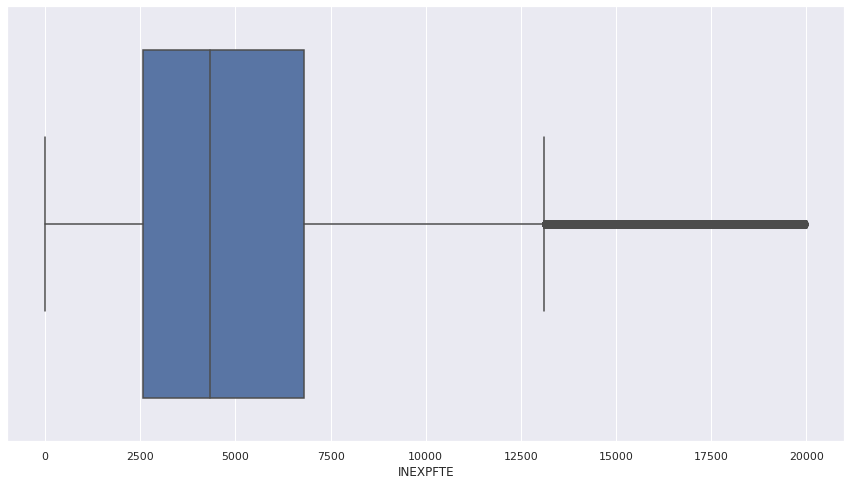

In [59]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='INEXPFTE',
             data=full_merged_df)

<AxesSubplot:xlabel='LPSTAFFORD_AMT'>

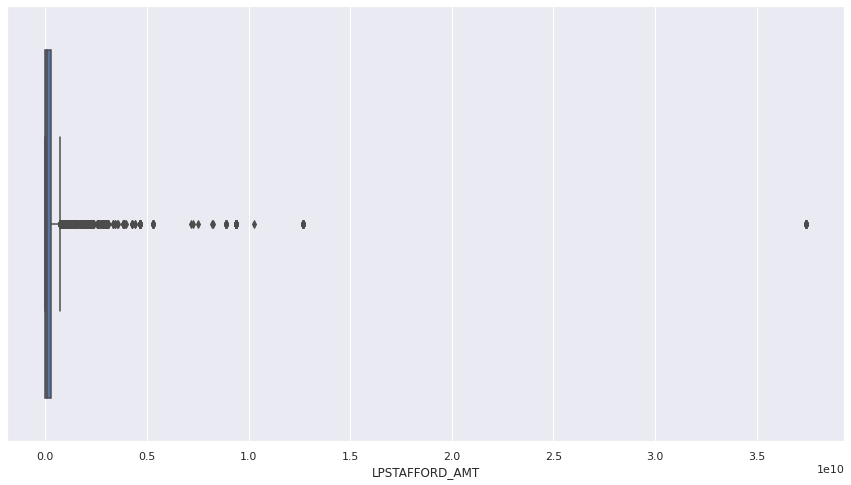

In [60]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='LPSTAFFORD_AMT',
             data=full_merged_df)

In [61]:
full_merged_df.loc[full_merged_df['LPSTAFFORD_AMT'] > 30000000000, 'INSTNM']

160661              University of Phoenix-Utah
160763        University of Phoenix-New Mexico
160946            University of Phoenix-Hawaii
161043        University of Phoenix-Washington
161232          University of Phoenix-Illinois
161361        University of Phoenix-New Jersey
162425           University of Phoenix-Arizona
162426        University of Phoenix-California
162427          University of Phoenix-Colorado
162428           University of Phoenix-Florida
162429           University of Phoenix-Georgia
162430         University of Phoenix-Louisiana
162431          University of Phoenix-Michigan
162432            University of Phoenix-Nevada
162433    University of Phoenix-North Carolina
162434         University of Phoenix-Tennessee
162435             University of Phoenix-Texas
162436          University of Phoenix-Virginia
162437      University of Phoenix-Pennsylvania
Name: INSTNM, dtype: object

### DATA VISUALIZATIONS

In [62]:
pcip_df = full_merged_df[base_cols + pcip_cols].copy()
pcip_college_df = select_colleges(pcip_df, colleges)

In [63]:
pcip_college_df.head()

INSTNM  year  PCIP01  PCIP03  PCIP04  PCIP05  \
0  University of Colorado Boulder  1996     0.0  0.0292  0.0278  0.0110   
1  University of Colorado Boulder  1997     0.0  0.0257  0.0282  0.0122   
2  University of Colorado Boulder  1998     0.0  0.0279  0.0323  0.0123   
3  University of Colorado Boulder  1999     0.0  0.0400  0.0303  0.0133   
4  University of Colorado Boulder  2000     0.0  0.0304  0.0275  0.0133   

   PCIP09  PCIP10  PCIP11  PCIP12  ...  PCIP44  PCIP45  PCIP46  PCIP47  \
0  0.0797     0.0  0.0122     0.0  ...     0.0  0.1625     0.0     0.0   
1  0.0775     0.0  0.0120     0.0  ...     0.0  0.1568     0.0     0.0   
2  0.0867     0.0  0.0164     0.0  ...     0.0  0.1479     0.0     0.0   
3  0.0910     0.0  0.0154     0.0  ...     0.0  0.1577     0.0     0.0   
4  0.0866     0.0  0.0173     0.0  ...     0.0  0.1586     0.0     0.0   

   PCIP48  PCIP49  PCIP50  PCIP51  PCIP52  PCIP54  
0     0.0     0.0  0.0504  0.0080  0.1579  0.0309  
1     0.0     0.0  0.0534  0.0092  0.1733  0.0239  
2     0.0     0.0  0.0577  0.0082  0.1741  0.0238  
3     0.0     0.0  0.0600  0.0060  0.1469  0.0280  
4     0.0     0.0  0.0591  0.0049  0.1713  0.0260  

[5 rows x 40 columns]

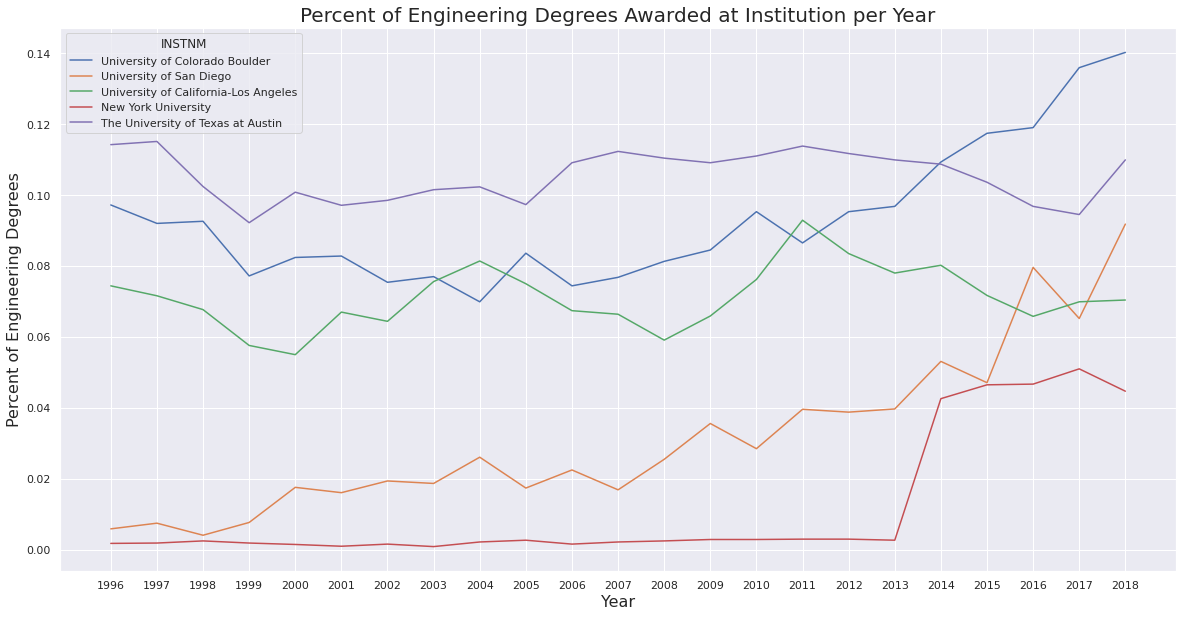

In [64]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.lineplot(x='year', y='PCIP14', hue='INSTNM', 
             data=pcip_college_df)
ax.set_title('Percent of Engineering Degrees Awarded at Institution per Year', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Percent of Engineering Degrees', fontsize=16)
ax.set_xticks(merged_years);

In [76]:
work_df = full_merged_df[base_cols + work_cols].copy()
work_college_df = select_colleges(work_df, colleges)

In [77]:
work_years = list(range(2007, 2019))

In [78]:
work_college_df = work_college_df.dropna()
work_college_df[work_cols] = work_college_df[work_cols].apply(pd.to_numeric, errors='coerce', axis=1)
work_college_df.head()

INSTNM  year  COUNT_NWNE_P10  COUNT_WNE_P10  \
11  University of Colorado Boulder  2007           382.0         3818.0   
13  University of Colorado Boulder  2009           522.0         3732.0   
15  University of Colorado Boulder  2011           625.0         4461.0   
22  University of Colorado Boulder  2018           583.0         4979.0   
34         University of San Diego  2007           115.0         1227.0   

    MN_EARN_WNE_P10  PCT90_EARN_WNE_P10  MN_EARN_WNE_INC3_P10  COUNT_NWNE_P6  \
11          58700.0            104700.0               61000.0          319.0   
13          56100.0             99900.0               58100.0          451.0   
15          55600.0             99400.0               58200.0          407.0   
22          59700.0             99400.0               62400.0          441.0   
34          68700.0            124800.0               72200.0           69.0   

    COUNT_WNE_P6  MN_EARN_WNE_P6  
11        4081.0         43400.0  
13        4373.0         39700.0  
15        3973.0         38600.0  
22        5113.0         42700.0  
34        1187.0         51700.0

In [79]:
work_college_df['perc_work_10'] = work_college_df['COUNT_WNE_P10'] / (work_college_df['COUNT_NWNE_P10'] + work_college_df['COUNT_WNE_P10'])
work_college_df['perc_work_6'] = work_college_df['COUNT_WNE_P6'] / (work_college_df['COUNT_NWNE_P6'] + work_college_df['COUNT_WNE_P6'])
work_college_df['inc_6_10_growth'] = work_college_df['MN_EARN_WNE_P10'] - work_college_df['MN_EARN_WNE_P6']

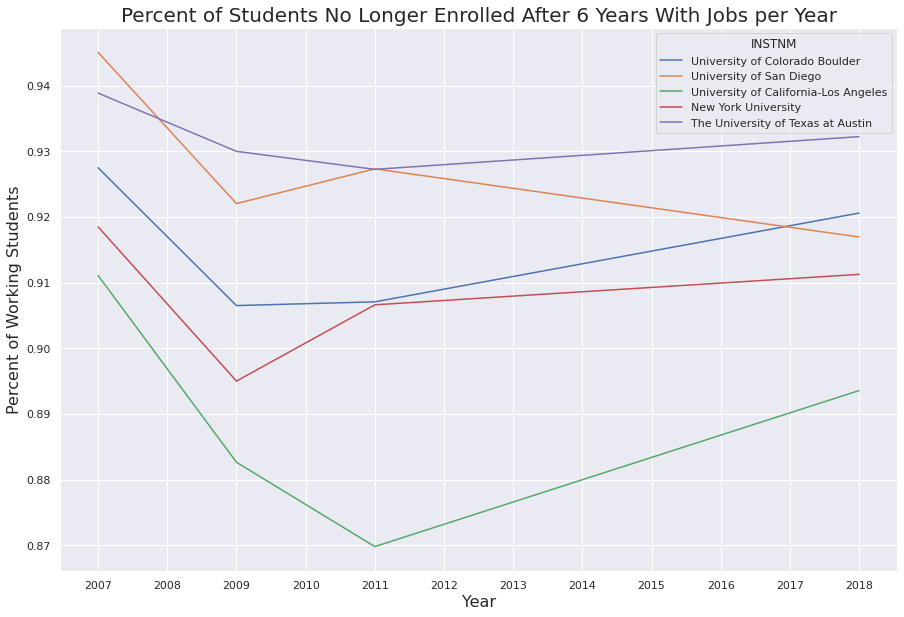

In [80]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(x='year', y='perc_work_6', hue='INSTNM', 
             data=work_college_df)
ax.set_title('Percent of Students No Longer Enrolled After 6 Years With Jobs per Year', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Percent of Working Students', fontsize=16)
ax.set_xticks(work_years);

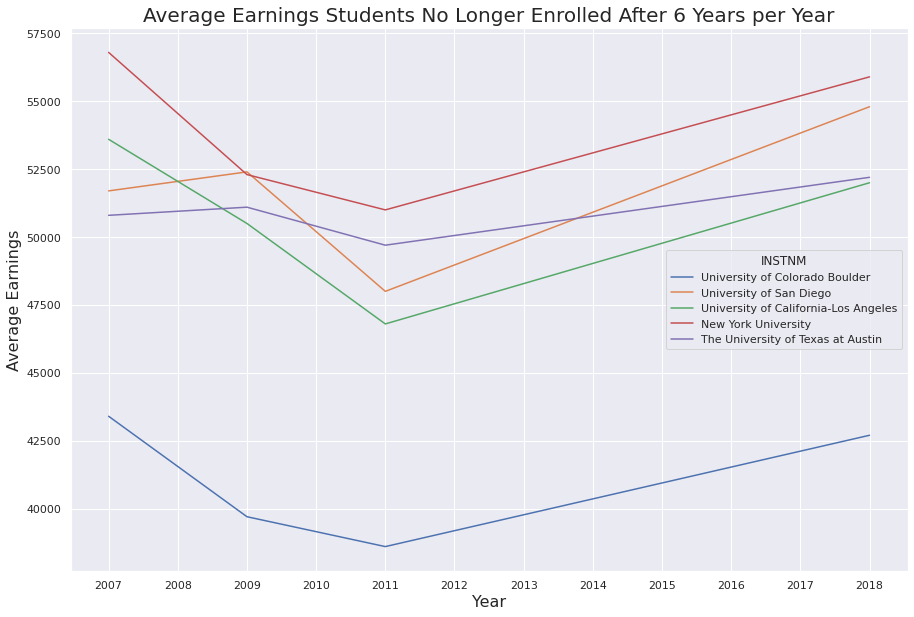

In [81]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(x='year', y='MN_EARN_WNE_P6', hue='INSTNM', 
             data=work_college_df)
ax.set_title('Average Earnings Students No Longer Enrolled After 6 Years per Year', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Average Earnings', fontsize=16)
ax.set_xticks(work_years);

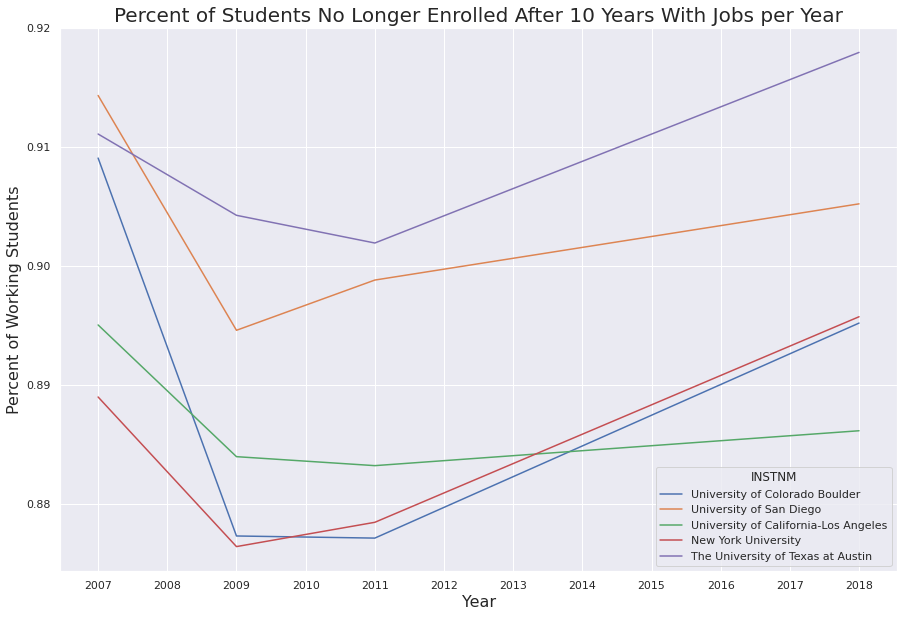

In [82]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(x='year', y='perc_work_10', hue='INSTNM', 
             data=work_college_df)
ax.set_title('Percent of Students No Longer Enrolled After 10 Years With Jobs per Year', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Percent of Working Students', fontsize=16)
ax.set_xticks(work_years);

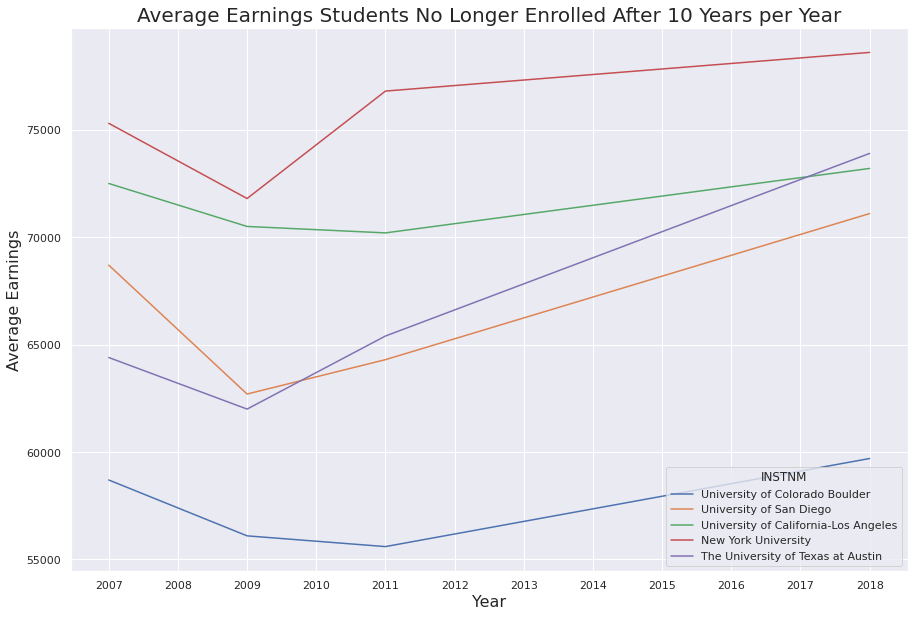

In [83]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(x='year', y='MN_EARN_WNE_P10', hue='INSTNM', 
             data=work_college_df)
ax.set_title('Average Earnings Students No Longer Enrolled After 10 Years per Year', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Average Earnings', fontsize=16)
ax.set_xticks(work_years);

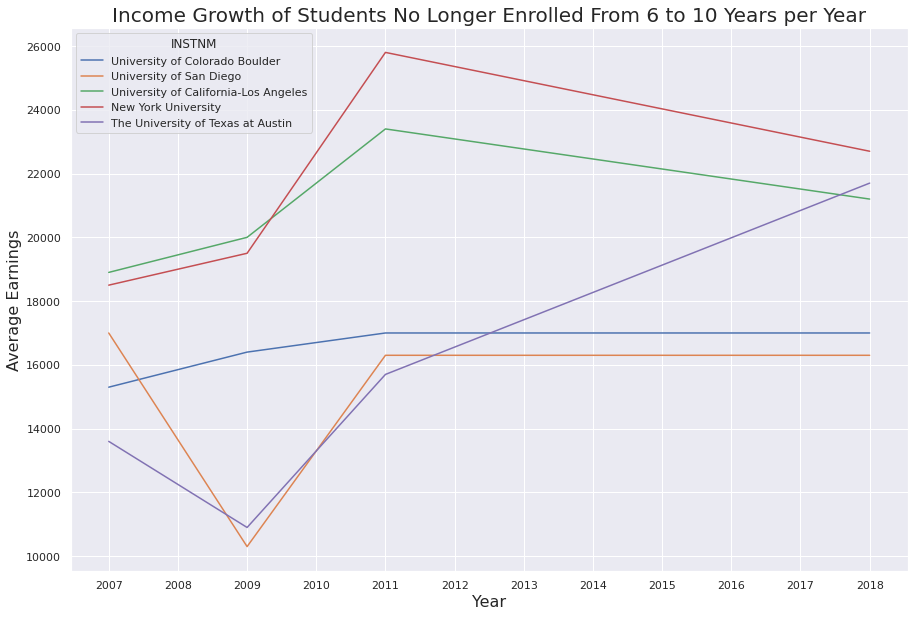

In [84]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(x='year', y='inc_6_10_growth', hue='INSTNM', 
             data=work_college_df)
ax.set_title('Income Growth of Students No Longer Enrolled From 6 to 10 Years per Year', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Average Earnings', fontsize=16)
ax.set_xticks(work_years);

In [85]:
price_df = full_merged_df[base_cols + price_cols].copy()
price_college_df = select_colleges(price_df, colleges)

In [86]:
price_college_df = select_colleges(price_df, colleges)
price_college_df.head()

INSTNM  year  COSTT4_A  COSTT4_P
0  University of Colorado Boulder  1996       NaN       NaN
1  University of Colorado Boulder  1997       NaN       NaN
2  University of Colorado Boulder  1998       NaN       NaN
3  University of Colorado Boulder  1999       NaN       NaN
4  University of Colorado Boulder  2000       NaN       NaN

In [87]:
price_college_df = price_college_df.replace(np.nan, 0)
price_college_df['avg_cost'] = price_college_df['COSTT4_A'] + price_college_df['COSTT4_P']
price_college_df.drop(['COSTT4_A', 'COSTT4_P'], axis =1, inplace=True)
price_college_df.drop(price_college_df.loc[price_college_df['avg_cost'] == 0].index, inplace=True)
price_college_df.sample(5)

INSTNM  year  avg_cost
63   University of California-Los Angeles  2013   31474.0
108     The University of Texas at Austin  2012   24525.0
38                University of San Diego  2011   52952.0
14         University of Colorado Boulder  2010   24757.0
22         University of Colorado Boulder  2018   30178.0

In [88]:
price_years = list(range(2009, 2019))

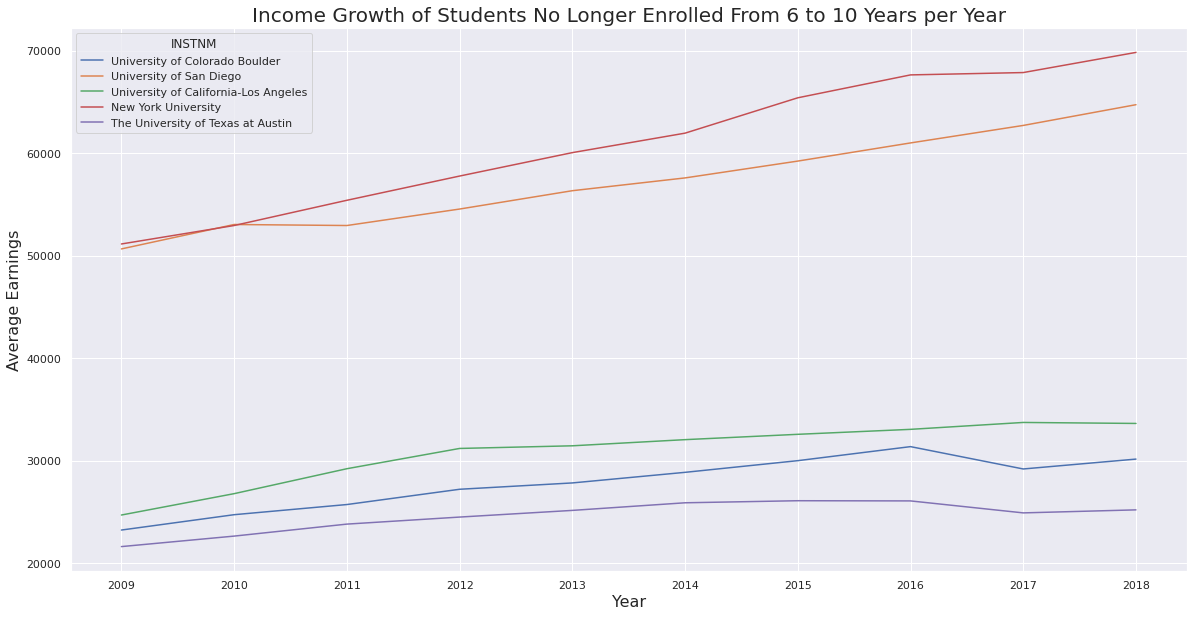

In [89]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.lineplot(x='year', y='avg_cost', hue='INSTNM', 
             data=price_college_df)
ax.set_title('Income Growth of Students No Longer Enrolled From 6 to 10 Years per Year', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Average Earnings', fontsize=16)
ax.set_xticks(price_years);

In [90]:
price_18_df = price_df.loc[price_df['year'] == 2018]
price_18_df = price_18_df.replace(np.nan, 0)
price_18_df["avg_cost"] = price_18_df['COSTT4_A'] + price_18_df['COSTT4_P']
price_18_df = price_18_df.loc[price_18_df['avg_cost'] > 0]

In [91]:
price_18_college_df = select_colleges(price_18_df, colleges)
price_18_college_df['color'] = sns.color_palette("muted", 5)

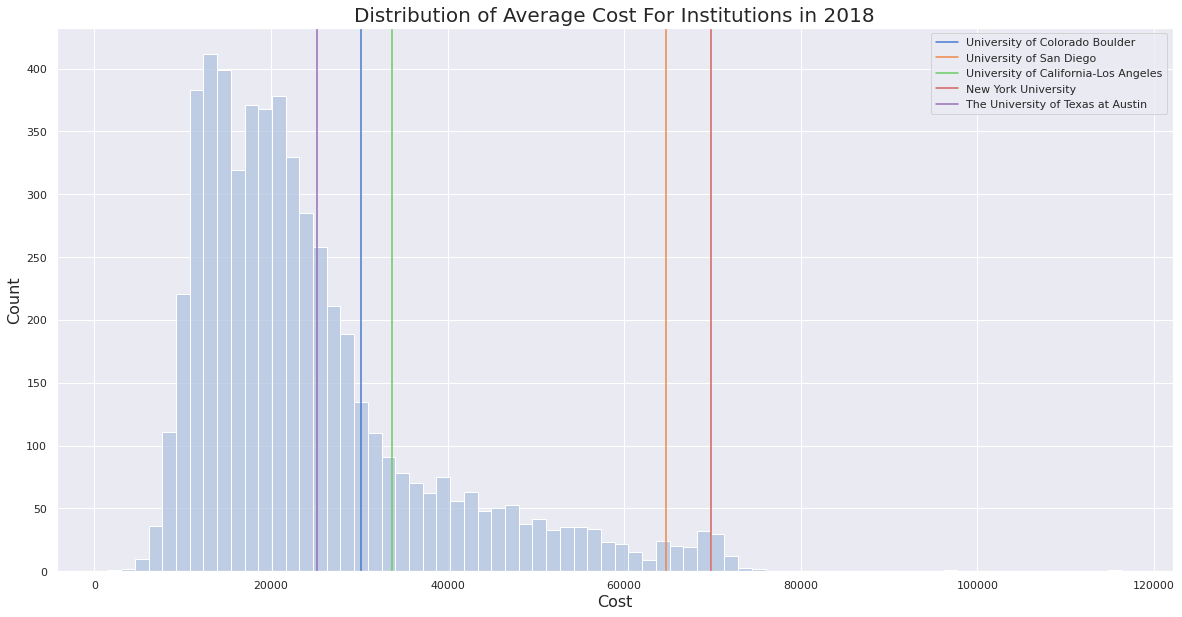

In [92]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.histplot(x='avg_cost', color = 'lightsteelblue',
             data=price_18_df)
for index, row in price_18_college_df.iterrows():
    plt.axvline(row['avg_cost'], label='{}'.format(row['INSTNM']), color=row['color'])
    
plt.legend()
ax.set_title('Distribution of Average Cost For Institutions in 2018', fontsize=20)
ax.set_xlabel('Cost', fontsize=16)
ax.set_ylabel('Count', fontsize=16);

### MODELS

In [172]:
corr_model_cols.remove('completion_rate')
hand_picked_model_cols.remove('completion_rate')
full_corr_df = full_merged_df[['STABBR', 'INSTNM'] + dependant_cols + corr_model_cols].copy()
full_hp_df = full_merged_df[dependant_cols + hand_picked_model_cols].copy()

In [173]:
full_corr_df['completion_rate'] = full_corr_df['C150_4'].fillna(full_corr_df['C150_L4'])
full_corr_df = full_corr_df.drop(['C150_4', 'C150_L4'], axis=1)
full_hp_df['completion_rate'] = full_hp_df['C150_4'].fillna(full_hp_df['C150_L4'])
full_hp_df = full_hp_df.drop(['C150_4', 'C150_L4'], axis=1)

In [174]:
full_hp_df['avg_cost'] = full_hp_df['COSTT4_A'].fillna(full_hp_df['COSTT4_P'])
full_hp_df = full_hp_df.drop(['COSTT4_A', 'COSTT4_P'], axis=1)

In [175]:
no_na_corr_df = full_corr_df.dropna().copy()
no_na_hp_df = full_hp_df.dropna().copy()

In [201]:
no_na_hp_df.drop(no_na_hp_df.loc[no_na_hp_df['completion_rate'] == 0].index, inplace=True)

In [157]:
print('full_corr_df row count:', full_corr_df.shape[0])
print('full_hp_df row count:', full_hp_df.shape[0])
print('no_na_corr_df row count:', no_na_corr_df.shape[0])
print('no_na_hp_df row count:', no_na_hp_df.shape[0])

full_corr_df row count: 163308
full_hp_df row count: 163308
no_na_corr_df row count: 114
no_na_hp_df row count: 1364


In [158]:
full_corr_df.isna().sum()

ACTWR25                          160896
SAT_AVG                          138060
COSTT4_A                         124150
BBRR2_FED_UGUNK_PAIDINFULL       162061
BBRR2_FED_GR_FBR                 161495
CONTROL                              29
PCIP24                            13672
CIP11ASSOC                         5946
CIP13ASSOC                         5946
CIP15ASSOC                         5946
CIP24ASSOC                         5946
CIP43ASSOC                         5946
CIP47ASSOC                         5946
CIP50ASSOC                         5946
CIP51ASSOC                         5946
CIP52CERT2                         5946
PPTUG_EF                          19790
PFTFTUG1_EF                       79946
NOLOAN_YR2_N                      68783
CUML_DEBT_P10                     57992
LOAN_EVER                         53965
PLUS_DEBT_INST_NOSTAFFTHIS_MD    159161
completion_rate                   35816
dtype: int64

In [159]:
full_hp_df.isna().sum()

MAIN                    0
NUMBRANCH               0
HIGHDEG                 0
PCIP24              13672
UGDS                18615
TUITFTE             21930
INEXPFTE            28288
PCTPELL             89465
PCTFLOAN            95947
AGE_ENTRY           21854
VETERAN             87456
FIRST_GEN           40000
POVERTY_RATE       127068
UNEMP_RATE         127068
STABBR                  0
INSTNM                  0
OPENADMP            25949
LPSTAFFORD_CNT     156902
LPSTAFFORD_AMT     156902
LPPPLUS_CNT        158359
LPPPLUS_AMT        158359
completion_rate     35816
avg_cost            99900
dtype: int64

Text(0, 0.5, 'Count')

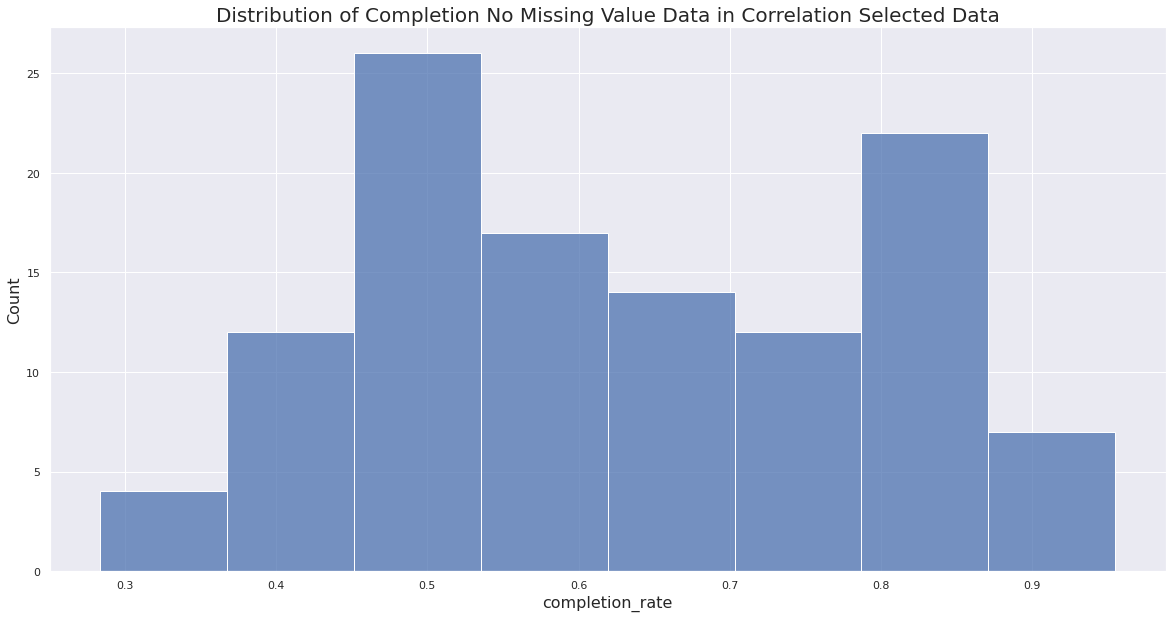

In [206]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.histplot(x='completion_rate',
             data=no_na_corr_df)
ax.set_title('Distribution of Completion No Missing Value Data in Correlation Selected Data', fontsize=20)
ax.set_xlabel('completion_rate', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import time

In [161]:
seed = 123456

In [211]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = round(100*(1 - metrics.mean_absolute_percentage_error(y_test, y_pred)), 2)
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
    print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
    print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
    print('Max Error:', metrics.max_error(y_test, y_pred))
    print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
    print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
    print('R^2:', metrics.r2_score(y_test, y_pred))
    print('Accuracy:', accuracy)
    return accuracy

def run_base_rf(df):
    X, y = df.drop('completion_rate', axis=1), np.array(df['completion_rate'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
    feature_names = [f'feature {i}' for i in range(X.shape[1])]
    forest = RandomForestRegressor(random_state=seed, n_jobs=-1)
    model = forest.fit(X_train, y_train)
    acc = evaluate(model, X_test, y_test)
    return model, X_train, X_test, y_train, y_test, acc

In [214]:
nc_model, nc_X_train, nc_X_test, nc_y_train, nc_y_test, nc_acc = run_base_rf(no_na_corr_df.drop(['STABBR', 'INSTNM'], axis=1))

Mean Absolute Error (MAE): 0.04137272413793107
Mean Squared Error (MSE): 0.003246414794241384
Root Mean Squared Error (RMSE): 0.056977318243678195
Mean Absolute Percentage Error (MAPE): 0.06463450024470295
Explained Variance Score: 0.8909981721984553
Max Error: 0.1312519999999997
Mean Squared Log Error: 0.0011845133759998251
Median Absolute Error: 0.025043000000000037
R^2: 0.880187712610196
Accuracy: 93.54


In [215]:
nhp_model, nhp_X_train, nhp_X_test, nhp_y_train, nhp_y_test, nhp_acc = run_base_rf(no_na_hp_df.drop(['STABBR', 'INSTNM'], axis=1))

Mean Absolute Error (MAE): 0.08772994411764705
Mean Squared Error (MSE): 0.013273031615126468
Root Mean Squared Error (RMSE): 0.11520864383858734
Mean Absolute Percentage Error (MAPE): 0.2814460575108755
Explained Variance Score: 0.6786552239621412
Max Error: 0.34266299999999994
Mean Squared Log Error: 0.006481341713847337
Median Absolute Error: 0.06609349999999986
R^2: 0.6719127164655458
Accuracy: 71.86


##### ^ I don't know what caused this but I don't have time to investigate

In [166]:
fc_model, fc_X_train, fc_X_test, fc_y_train, fc_y_test, fc_acc = run_base_rf(full_corr_df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

##### ^ Random Forest can't take than empty values in the data

In [178]:
def mn_gt_0(x):
    if np.isnan(x).all():
        return np.nan
    else:
        with warnings.catch_warnings():
            warnings.filterwarnings('error')
            try:
                return np.nanmean([i for i in x if i > 0])
            except RuntimeWarning:
                return np.nan

def state_group_avg(df):
    i_df = df.copy()
    for col in i_df.columns:
        if i_df[col].isna().sum():
            i_df[col] = i_df.groupby('STABBR')[col].apply(lambda x: x.fillna(mn_gt_0(x)))
    return i_df

def inst_group_avg(df):
    i_df = df.copy()
    for col in i_df.columns:
        if i_df[col].isna().sum():
            i_df[col] = i_df.groupby('INSTNM')[col].apply(lambda x: x.fillna(mn_gt_0(x)))
    return i_df

In [179]:
avgd_full_corr_df = inst_group_avg(full_corr_df)
avgd_full_corr_df = state_group_avg(avgd_full_corr_df)
for col in avgd_full_corr_df.columns:
    print(col, avgd_full_corr_df[col].isna().sum())

STABBR 0
INSTNM 0
ACTWR25 3874
SAT_AVG 208
COSTT4_A 0
BBRR2_FED_UGUNK_PAIDINFULL 192
BBRR2_FED_GR_FBR 145
CONTROL 0
PCIP24 0
CIP11ASSOC 0
CIP13ASSOC 0
CIP15ASSOC 0
CIP24ASSOC 0
CIP43ASSOC 1
CIP47ASSOC 16
CIP50ASSOC 1
CIP51ASSOC 0
CIP52CERT2 15
PPTUG_EF 0
PFTFTUG1_EF 0
NOLOAN_YR2_N 122
CUML_DEBT_P10 145
LOAN_EVER 122
PLUS_DEBT_INST_NOSTAFFTHIS_MD 1613
completion_rate 0


In [180]:
avgd_full_hp_df = inst_group_avg(full_hp_df)
avgd_full_hp_df = state_group_avg(avgd_full_hp_df)
for col in avgd_full_hp_df.columns:
    print(col, avgd_full_hp_df[col].isna().sum())

MAIN 0
NUMBRANCH 0
HIGHDEG 0
PCIP24 0
UGDS 0
TUITFTE 0
INEXPFTE 0
PCTPELL 0
PCTFLOAN 95
AGE_ENTRY 0
VETERAN 47
FIRST_GEN 0
POVERTY_RATE 0
UNEMP_RATE 0
STABBR 0
INSTNM 0
OPENADMP 0
LPSTAFFORD_CNT 145
LPSTAFFORD_AMT 145
LPPPLUS_CNT 145
LPPPLUS_AMT 145
completion_rate 0
avg_cost 0


In [195]:
avgd_full_corr_df = avgd_full_corr_df.dropna()
avgd_full_corr_df.drop(['STABBR', 'INSTNM'], axis=1, inplace=True)
avgd_full_corr_df.drop(avgd_full_corr_df.loc[avgd_full_corr_df['completion_rate'] == 0].index, inplace=True)
avgd_full_hp_df = avgd_full_hp_df.dropna()
avgd_full_hp_df.drop(['STABBR', 'INSTNM'], axis=1, inplace=True)
avgd_full_hp_df.drop(avgd_full_hp_df.loc[avgd_full_hp_df['completion_rate'] == 0].index, inplace=True)

Text(0, 0.5, 'Count')

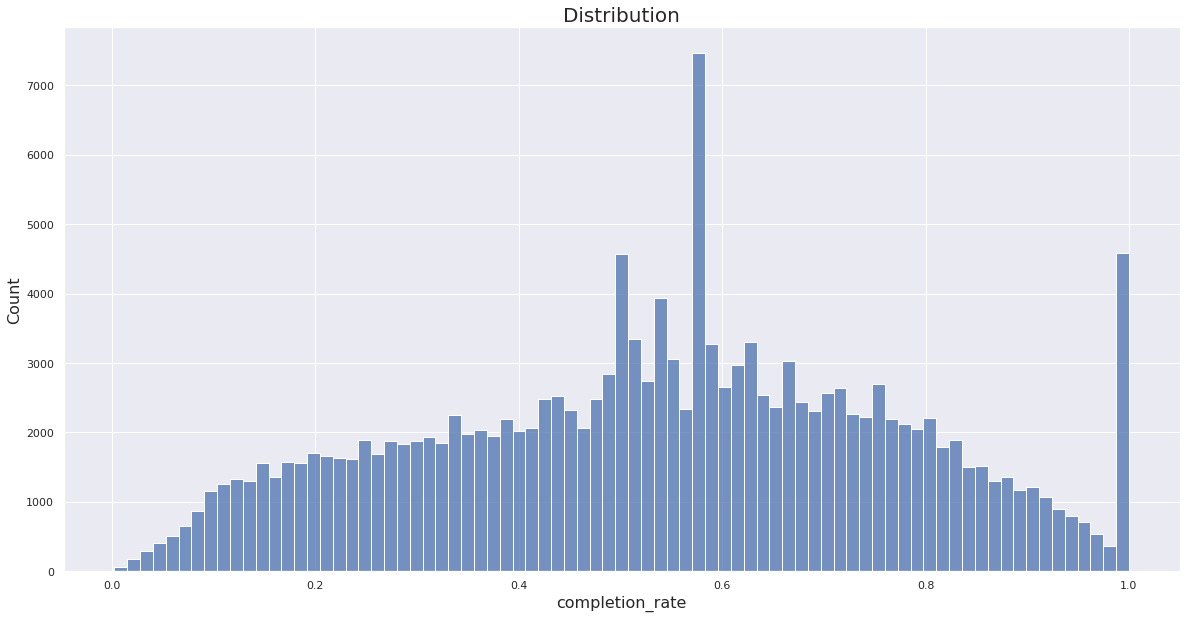

In [204]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.histplot(x='completion_rate',
             data=avgd_full_corr_df)
ax.set_title('Distribution of Completion for Averaged Data', fontsize=20)
ax.set_xlabel('completion_rate', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

In [197]:
avgd_full_corr_df.shape

(156736, 23)

In [198]:
avgd_full_hp_df.shape

(161830, 21)

In [217]:
afc_model, afc_X_train, afc_X_test, afc_y_train, afc_y_test, afc_acc = run_base_rf(avgd_full_corr_df)

Mean Absolute Error (MAE): 0.08106505957629298
Mean Squared Error (MSE): 0.015785614001590297
Root Mean Squared Error (RMSE): 0.12564081343890726
Mean Absolute Percentage Error (MAPE): 0.24376367506733773
Explained Variance Score: 0.711744953434305
Max Error: 0.8624684702312388
Mean Squared Log Error: 0.006644721545472342
Median Absolute Error: 0.047888475919451154
R^2: 0.7116931634252588
Accuracy: 75.62


In [216]:
afhp_model, afhp_X_train, afhp_X_test, afhp_y_train, afhp_y_test, afhp_acc = run_base_rf(avgd_full_hp_df)

Mean Absolute Error (MAE): 0.07662529207808291
Mean Squared Error (MSE): 0.01421959709199821
Root Mean Squared Error (RMSE): 0.11924595209900506
Mean Absolute Percentage Error (MAPE): 0.2673343421141495
Explained Variance Score: 0.7417899986934164
Max Error: 0.8969477777777777
Mean Squared Log Error: 0.0060789419742360235
Median Absolute Error: 0.04542022979797983
R^2: 0.7417823629949571
Accuracy: 73.27


In [208]:
from sklearn.model_selection import RandomizedSearchCV

In [247]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': [None],
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [231]:
afc_rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 15, cv = 3, verbose=2, random_state=seed, n_jobs = -1)

In [232]:
%%time
afc_rf_random.fit(afc_X_train, afc_y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
CPU times: user 35.1 s, sys: 571 ms, total: 35.7 s
Wall time: 6min 35s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 7, 10, 13, 16, 18, 21,
                                                      24, 27, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 77, 105, 133, 161,
                                                         188, 216, 244, 272,
                                                         300]},
                   random_state=123456, verbose=2)

In [233]:
afc_rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 24,
 'bootstrap': True}

In [234]:
afc_best_random = afc_rf_random.best_estimator_
afc_random_accuracy = evaluate(afc_best_random, afc_X_test, afc_y_test)

Mean Absolute Error (MAE): 0.08267296747442149
Mean Squared Error (MSE): 0.015804741582606294
Root Mean Squared Error (RMSE): 0.1257169104878349
Mean Absolute Percentage Error (MAPE): 0.2494655054482611
Explained Variance Score: 0.7114014984489889
Max Error: 0.8428481908871985
Mean Squared Log Error: 0.006669090076581331
Median Absolute Error: 0.05030432523140331
R^2: 0.7113438192455839
Accuracy: 75.05


In [248]:
nc_rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=seed, n_jobs = -1)

In [249]:
%%time
nc_rf_random.fit(nc_X_train, nc_y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
CPU times: user 424 ms, sys: 9.39 ms, total: 433 ms
Wall time: 7.11 s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [150, 188, 227, 266,
                                                         305, 344, 383, 422,
                                                         461, 500]},
                   random_state=123456, verbose=2)

In [250]:
nc_rf_random.best_params_

{'n_estimators': 188,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [246]:
nc_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123456,
 'verbose': 0,
 'warm_start': False}

In [251]:
nc_best_random = nc_rf_random.best_estimator_
nc_random_accuracy = evaluate(nc_best_random, nc_X_test, nc_y_test)

Mean Absolute Error (MAE): 0.0581360418195157
Mean Squared Error (MSE): 0.0054464585231556424
Root Mean Squared Error (RMSE): 0.07380012549552774
Mean Absolute Percentage Error (MAPE): 0.08580457877039314
Explained Variance Score: 0.8364851007441481
Max Error: 0.1923393617021275
Mean Squared Log Error: 0.001843172867068327
Median Absolute Error: 0.044419680851064514
R^2: 0.7989928289538065
Accuracy: 91.42
